# Regressão Linear

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline 

## 4.1. Exemplo Simplificado
Primeiro, vamos analisar um exemplo simplificado em que temos apenas 1 feature e o target, que são, respectivamente, a altura e o peso de uma pessoa.

O exemplo abaixo foi adaptado desse artigo: <https://dzone.com/articles/linear-regression-using-python-scikit-learn>.

Primeiro, precisamos criar o dataset e treinar o modelo:

In [2]:
from sklearn.linear_model import LinearRegression

# Definição do dataset
height=[[4.0], [4.5], [5.0], [5.2], [5.4], [5.8], [6.1], [6.2], [6.4], [6.8]]
weight=[  42 ,   44 ,   49 ,   55 ,   53 ,   58 ,   60 ,   64 ,   66 ,   69 ]

# Criação do modelo de regressão linear
rl = LinearRegression()

# Treinamento do modelo
rl.fit(height, weight)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

O modelo acima encontrou uma reta na forma $y = mx + b$ que mais se aproxima dos pontos do dataset. Os coeficientes $m$ e $b$ são armazenados nos atributos `rl.coef_` e `rl.intercept_`.

Obs: A sintaxe `print(f'{x:.1f}')` imprime o valor da variável x com uma casa decimal (veja mais sobre f-strings [aqui](https://realpython.com/python-f-strings/)).

In [3]:
m = rl.coef_[0]
b = rl.intercept_
print(f'm = {m:.1f}, b = {b:.1f}')
print(f'Equação da reta: y = {m:.1f}x + {b:.1f}')

m = 10.2, b = -0.5
Equação da reta: y = 10.2x + -0.5


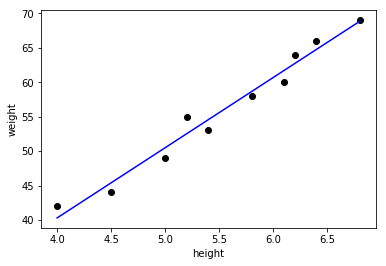

In [4]:
# Scatter plot da altura e peso de cada pessoa
plt.scatter(height, weight, color='black')

# Gráfico de linha 
predicted_values = rl.predict(height)
plt.plot(height, predicted_values, color='blue')
plt.xlabel('height')
plt.ylabel('weight')

plt.show()

## 4.2 Boston House Prices

Agora vamos aplicar a regressão linear em um caso com várias features: um dataset em que as features são características de algumas casas e o target é o preço de cada casa.

In [5]:
# Carregamos o dataset boston house prices do sklearn
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
print(boston.DESCR) # Mostra a descrição do dataset

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
bos = pd.DataFrame(boston.data)     # Convertendo boston.data para um DataFrame
bos.columns  = boston.feature_names # Ajustando nomes das colunas do DataFrame
bos['PRICE'] = boston.target        # Adicionando a coluna de preços das casas

bos.head() # Mostra os primeiros 5 elementos do DataFrame

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Nesse dataset, vamos avaliar o modelo usando validação cruzada. Para isso, usaremos a função `cross_val_score` do sklearn.

In [8]:
from sklearn.model_selection import cross_val_score

X = bos.drop('PRICE', axis=1) # Cria uma cópia do dataset sem a coluna PRICE (target)
y = bos.PRICE

lr = LinearRegression() # Cria um modelo de regressão linear

# k-fold cross validation com k=10
# A função de custo é o erro quadrático médio
scores = cross_val_score(lr, X, y, cv=10, scoring='neg_mean_squared_error')
scores

array([  -9.28694671,  -14.15128316,  -14.07360615,  -35.20692433,
        -31.88511666,  -19.83587796,   -9.94726918, -168.37537954,
        -33.32974507,  -10.96041068])

Como ficou claro acima, a função cross_val_score retorna o score em cada iteração da validação cruzada. Para calcular o score médio, fazemos:

In [9]:
scores.mean()

-34.705255944524886

Do mesmo modo que no caso de uma variável, podemos ver os coeficientes de cada uma das features (`lr.coef_`) e o termo constante (`lr.intercept_`) na regressão linear:

In [10]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
lr.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [12]:
lr.intercept_

36.45948838508978